# COMP 10020 Introduction to Programming 2
## Lab 5 
## Triathlone Data Analysis

Often referred to as **sabremetrics**, analysis of sports data has become a huge application domain for data science. Anaysing sports data allows teams organise themselves better, athletes better understand what drives their performance, and fans get closer to the game. In this assignment we will anayse data from the 2017 Triathlone Sprint Triathlon event [Triathlone](http://www.triathlone.com/) to understand what drives triathlon success. A triathlon is a multi-sport event in which atheletes complete a **swim**, a **cycle** and a **run** in the fastest time possible. Between the swim and cycle and cycle and run there are timed **transitions** during which competitors change equipment.
<img src = "files/triathlone.jpg" width = "500">

We will follow the data science pipeline discussed in class and shown in the image below (adopted from [Hadley Wickham](http://r4ds.had.co.nz/intro.html)).
<img src = "files/DataScienceProcess.png" width = "500">

In [166]:
# Import useful packages for data science
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random
%matplotlib inline  

## Question 1: Import 

Load the dataset stored in the file **TriathloneData.csv**. The variables in this dataset are as follows:

* **Place:** The place in which the athlete finished the race (missing for non-finishers)
* **Number:** The athlete's race bib number
* **Wave:** The wave with which the athlete started (one of 1, 2, or 3)
* **Age_Cat:** The athlete's age category (one of 16-19, 20-29, 30-39, 40-49, or 50+)
* **Gender:** The gender that the athlete declared (one of 'M' or 'F')
* **TI_Number:** Some athlete's are members of the Traithlon Ireland association and if so declare their membership number	
* **Swim:** The time taken for the swimming leg of the event (in format hh:mm:ss)
* **T1:** The time taken for the first transition of the event (in format hh:mm:ss)
* **Cycle:** The time taken for the cycling leg of the event (in format hh:mm:ss)
* **T2:** The time taken for the swimming leg of the event (in format hh:mm:ss)
* **Run:** The time taken for the running leg of the event (in format hh:mm:ss)
* **Finish:** The time taken for the total event (in format hh:mm:ss)

In [167]:
# Load TriathloneData.csv
triathlon_data = pd.read_csv('TriathloneData.csv')
triathlon_data.head()

,Place,Number,Wave,Age_Cat,Gender,TI_Number,Swim,T1,Cycle,T2,Run,Finish
0,11.0,46,1,16-19,M,10052793,00:08:38,00:01:04,00:38:13,00:00:42,00:24:06,01:12:44
1,8.0,151,1,40-49,M,10046427,00:14:37,00:01:21,00:35:14,00:00:59,00:19:52,01:12:03
2,3.0,110,1,30-39,M,NaN,00:10:21,00:01:25,00:33:02,00:00:53,00:21:22,01:07:03
3,2.0,103,1,30-39,M,10045063,00:10:16,00:01:27,00:33:36,00:00:58,00:20:25,01:06:42
4,4.0,155,1,40-49,M,10042375,00:10:21,00:01:29,00:33:25,00:00:53,00:24:34,01:10:43


Load the dataset stored in the file **provinces.csv**. The variables in this dataset are as follows:

* **Number:** The athlete's race bib number
* **Province:** The Irish province in which the athlete lives

In [168]:
#provinces = ['Leinster', 'Munster', 'Ulster', 'Connacht']
#province_p = [0.5, 0.3, 0.15, 0.05]
#p = np.random.choice(provinces, size=len(trathlon_data), replace=True, p=province_p)
#
#province_df = pd.DataFrame(trathlon_data["Number"])
#province_df["Province"] = p
#
#province_df.head(25)
#
#province_df.to_csv("provinces.csv", index=False)

In [169]:
# Load TriathloneData.csv
provinces = pd.read_csv('provinces.csv')
provinces.head()

,Number,Province
0,46,Leinster
1,53,Connacht
2,57,Leinster
3,61,Leinster
4,64,Leinster


## Question 2: Tidy 

Convert the string times into seconds. For example, the Swim time for the first athlete "00:08:38" should convert to 518 seconds.

Define a function to convert times into seconds.

In [170]:
def hms_to_seconds(t):
    if(type(t) != str):
        return np.NaN
    else:
        h, m, s = [int(i) for i in t.split(':')]
        return 3600*h + 60*m + s

Convert times into seconds for each portion of the race. The pandas Series **apply** function used togehter with the **hms_to_seconds** function defined above can be used for this.

In [171]:
triathlon_data["Swim_secs"] = triathlon_data["Swim"].apply(hms_to_seconds)
triathlon_data["T1_secs"] = triathlon_data["T1"].apply(hms_to_seconds)
triathlon_data["Cycle_secs"] = triathlon_data["Cycle"].apply(hms_to_seconds)
triathlon_data["T2_secs"] = triathlon_data["T2"].apply(hms_to_seconds)
triathlon_data["Run_secs"] = triathlon_data["Run"].apply(hms_to_seconds)
triathlon_data["Finish_secs"] = triathlon_data["Finish"].apply(hms_to_seconds)
triathlon_data.head()

,Place,Number,Wave,Age_Cat,Gender,TI_Number,Swim,T1,Cycle,T2,Run,Finish,Swim_secs,T1_secs,Cycle_secs,T2_secs,Run_secs,Finish_secs
0,11.0,46,1,16-19,M,10052793,00:08:38,00:01:04,00:38:13,00:00:42,00:24:06,01:12:44,518,64.0,2293.0,42.0,1446.0,4364.0
1,8.0,151,1,40-49,M,10046427,00:14:37,00:01:21,00:35:14,00:00:59,00:19:52,01:12:03,877,81.0,2114.0,59.0,1192.0,4323.0
2,3.0,110,1,30-39,M,NaN,00:10:21,00:01:25,00:33:02,00:00:53,00:21:22,01:07:03,621,85.0,1982.0,53.0,1282.0,4023.0
3,2.0,103,1,30-39,M,10045063,00:10:16,00:01:27,00:33:36,00:00:58,00:20:25,01:06:42,616,87.0,2016.0,58.0,1225.0,4002.0
4,4.0,155,1,40-49,M,10042375,00:10:21,00:01:29,00:33:25,00:00:53,00:24:34,01:10:43,621,89.0,2005.0,53.0,1474.0,4243.0


## Question 2: Model 

Perform a simple analysis of the dataset to answer the questions listed below.

**a)** What is the average finish time?

In [172]:
print("Average finishing time: ", triathlon_data["Finish_secs"].mean())

Average finishing time:  5350.733695652174


**b)** What is minimum, mean and maximum cycling times?

In [173]:
print("Min cycling time: ", triathlon_data["Cycle_secs"].min())
print("Mean cycling time: ", triathlon_data["Cycle_secs"].mean())
print("Max cycling time: ", triathlon_data["Cycle_secs"].max())

Min cycling time:  1867.0
Mean cycling time:  2628.5661375661375
Max cycling time:  4285.0


**c)** On average which component takes the longest: swimming, cycling or running?

In [174]:
print("Mean swimming time: ", triathlon_data["Swim_secs"].mean())
print("Mean cycling time: ", triathlon_data["Cycle_secs"].mean())
print("Mean running time: ", triathlon_data["Run_secs"].mean())

Mean swimming time:  859.1684210526316
Mean cycling time:  2628.5661375661375
Mean running time:  1618.5760869565217


**d)** Did more men or women take part in the event?

In [175]:
display(triathlon_data["Gender"].value_counts())

M    138
F     52
Name: Gender, dtype: int64

**e)** What is the difference between the average event finish time for males and for females?

In [176]:
male_only = triathlon_data[triathlon_data["Gender"] == "M"]
female_only = triathlon_data[triathlon_data["Gender"] == "F"]
print("Male average finishing time: ", male_only["Finish_secs"].mean())
print("Female average finishing time: ", female_only["Finish_secs"].mean())
print("Male-Female difference: ", male_only["Finish_secs"].mean() - female_only["Finish_secs"].mean())

Male average finishing time:  5240.762962962963
Female average finishing time:  5653.714285714285
Male-Female difference:  -412.95132275132255


## Question 3: Visualise 

Generate some visualisations from the dataset.

**a)** Plot a histogram of finishing times.

Text(0.5,0,'Time (seconds)')

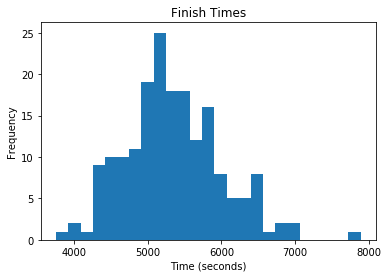

In [177]:
# Make a  histogram of durations
triathlon_data["Finish_secs"].plot(kind="hist", bins=25, title = "Finish Times")
plt.xlabel("Time (seconds)")

**b)** Draw an appropriate visualisation to compare the finishing times of different genders.

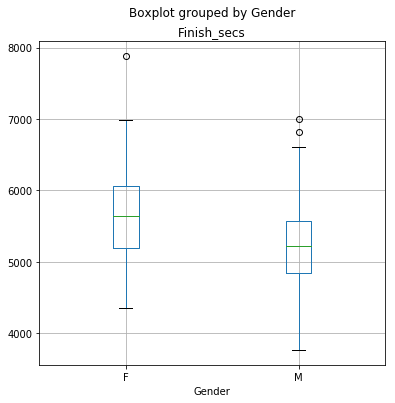

In [178]:
triathlon_data.boxplot("Finish_secs", "Gender", figsize=(6, 6))

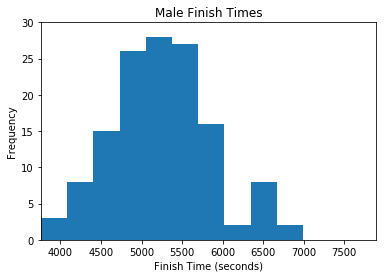

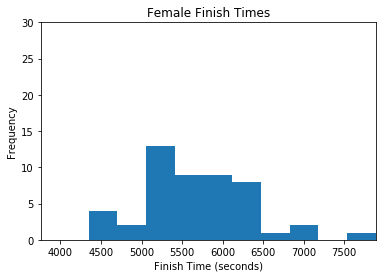

In [179]:
male_only = triathlon_data[triathlon_data["Gender"] == "M"]
female_only = triathlon_data[triathlon_data["Gender"] == "F"]

x_lims = (triathlon_data["Finish_secs"].min(), triathlon_data["Finish_secs"].max())
# Draw histrograms of Tchaikovsky and Beethoven performance durations
male_only["Finish_secs"].plot(kind="hist", xlim = x_lims, ylim = (0, 30), title="Male Finish Times")
plt.xlabel("Finish Time (seconds)")
plt.show()
female_only["Finish_secs"].plot(kind="hist", xlim = x_lims, ylim = (0, 30), title="Female Finish Times")
plt.xlabel("Finish Time (seconds)")
plt.show()

**c)** Draw an appropriate visualisation to compare the finishing times of difference age groups.

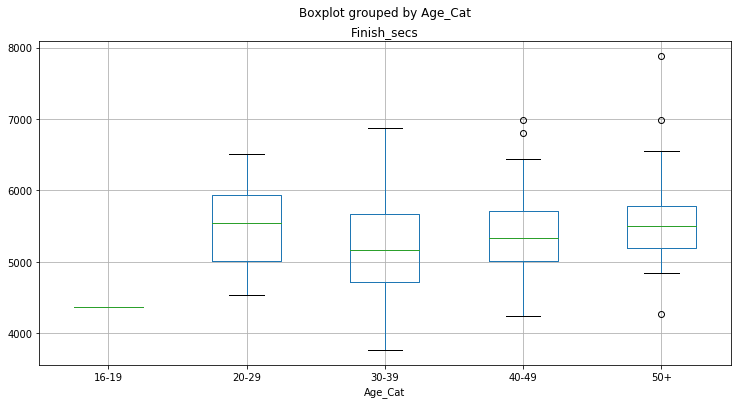

In [180]:
triathlon_data.boxplot("Finish_secs", "Age_Cat", figsize=(12, 6))

**d)** Draw an appropriate visualisation to determine whether or not Transition 2 times correlate with Finish times.

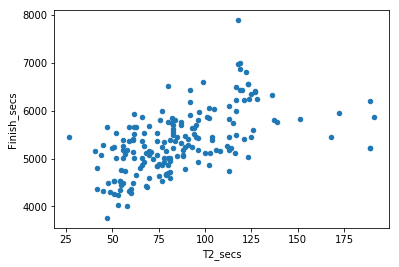

In [181]:
triathlon_data.plot(kind='scatter', x='T2_secs', y='Finish_secs');

**e)** Draw a scatter plot matrix to explore the realtionships between the times taken by each athlete for each different component of the triathlon.

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


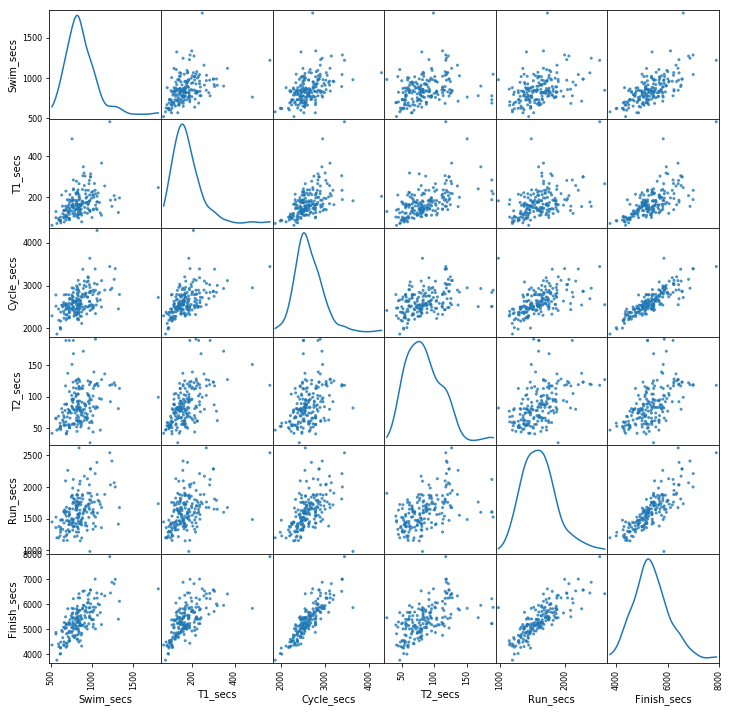

In [182]:
_ = pd.scatter_matrix(triathlon_data[["Swim_secs", "T1_secs", "Cycle_secs", "T2_secs", "Run_secs", "Finish_secs"]], alpha=0.8, figsize=(12, 12), diagonal='kde')

**f)** Draw a visualsiation to show the number of athletes who took part from each province.

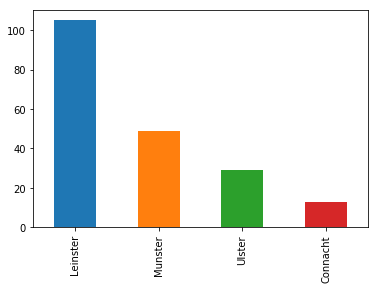

In [183]:
provinces["Province"].value_counts().plot(kind = "bar")

## Question 4: Transform 

Ask deeper questions which require merging the two datasets.

**a)** Which province has the fastest finishers on average?

In [184]:
triathlon_data_with_provinces = pd.merge(triathlon_data, provinces, on="Number", how = 'inner')
triathlon_data_with_provinces.head()

,Place,Number,Wave,Age_Cat,Gender,TI_Number,Swim,T1,Cycle,T2,Run,Finish,Swim_secs,T1_secs,Cycle_secs,T2_secs,Run_secs,Finish_secs,Province
0,11.0,46,1,16-19,M,10052793,00:08:38,00:01:04,00:38:13,00:00:42,00:24:06,01:12:44,518,64.0,2293.0,42.0,1446.0,4364.0,Leinster
1,8.0,151,1,40-49,M,10046427,00:14:37,00:01:21,00:35:14,00:00:59,00:19:52,01:12:03,877,81.0,2114.0,59.0,1192.0,4323.0,Leinster
2,3.0,110,1,30-39,M,NaN,00:10:21,00:01:25,00:33:02,00:00:53,00:21:22,01:07:03,621,85.0,1982.0,53.0,1282.0,4023.0,Munster
3,2.0,103,1,30-39,M,10045063,00:10:16,00:01:27,00:33:36,00:00:58,00:20:25,01:06:42,616,87.0,2016.0,58.0,1225.0,4002.0,Ulster
4,4.0,155,1,40-49,M,10042375,00:10:21,00:01:29,00:33:25,00:00:53,00:24:34,01:10:43,621,89.0,2005.0,53.0,1474.0,4243.0,Munster


In [185]:
triathlon_data_with_provinces_grp = triathlon_data_with_provinces.groupby("Province")
triathlon_data_with_provinces_grp["Finish_secs"].mean()

Province
Connacht    5342.000000
Leinster    5410.298969
Munster     5228.577778
Ulster      5257.500000
Name: Finish_secs, dtype: float64

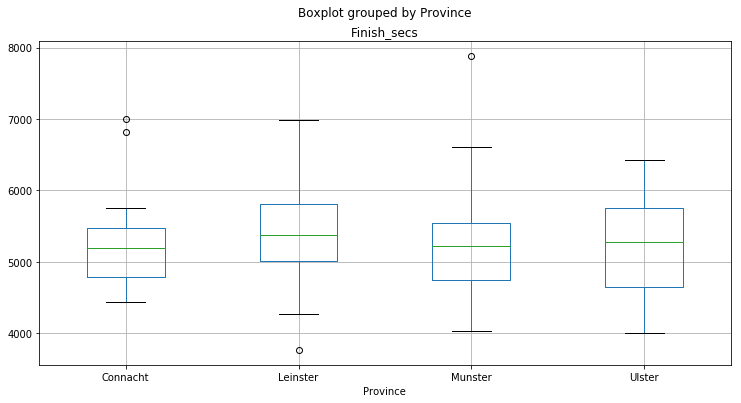

In [186]:
triathlon_data_with_provinces.boxplot("Finish_secs", "Province", figsize=(12, 6))